In [104]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [105]:
#setting the color pallete
palette = sns.color_palette("dark")
sns.set_palette(palette)
sns.set_style('whitegrid')

In [106]:
#Reading the data
data=pd.read_csv(r'C:\Users\DELL\Desktop\projects\E-commerce regression models\Ecommerce Customers.csv')
data


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


# Exploratory Data Analysis


In [107]:
# checking the Five-number summary
data.describe() 

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [108]:
# checking the datatype and presence null value
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


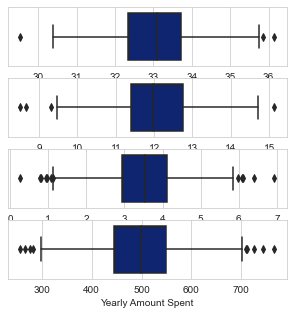

In [109]:
#checking for outliers.
fig,axs=plt.subplots(4,figsize=(5,5)) #checking for outliers
plt1=sns.boxplot(data=data,x=data['Avg. Session Length'],ax=axs[0])
plt2 = sns.boxplot(data=data,x=data['Time on App'], ax = axs[1])
plt3 = sns.boxplot(data=data,x=data['Length of Membership'], ax = axs[2])
plt3 = sns.boxplot(data=data,x=data['Yearly Amount Spent'], ax = axs[3])


Here, there are outliers present are few in nmbers and are almost close to the upper limit, thus we dont remove them as Some outliers represent natural variations in the population, and they should be left as is in your dataset.
 

In [110]:
 #finding the correlation between variables
data.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


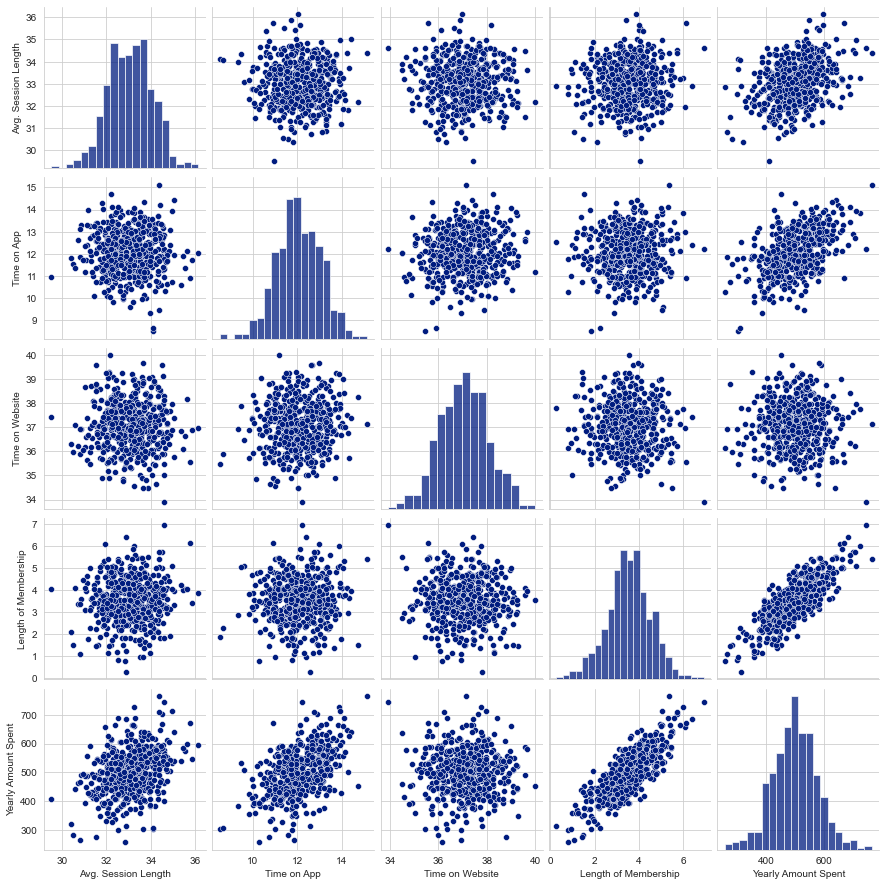

In [111]:
 #exploring the relationships between variables within a dataset
sns.pairplot(data)

# Linear Regression Model

In [112]:
#checking the correaltion between these 2 variables as their scatterplot shows a somewhat linear trend

data["Length of Membership"].corr(data['Yearly Amount Spent']) 

0.809083568247581

(0.0, 790.9608559212762)

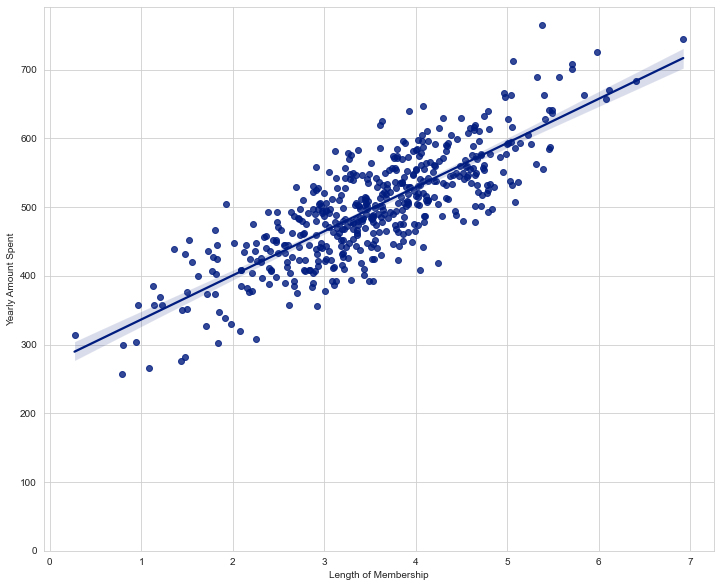

In [113]:
#Generating a regplot to see how the the best fitted linear regression line going through the data.
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='Length of Membership',y='Yearly Amount Spent', data=data)
plt.ylim(0,)

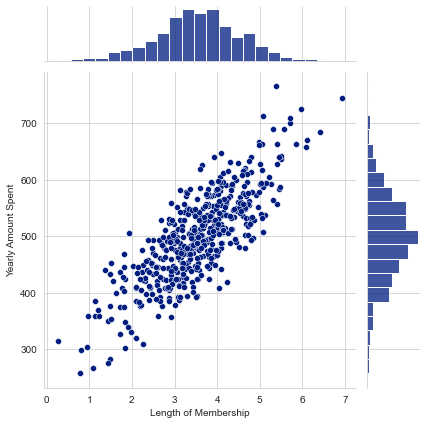

In [114]:
# a jointplot to better understand the data
sns.jointplot(x=data['Length of Membership'], y=data['Yearly Amount Spent']) 

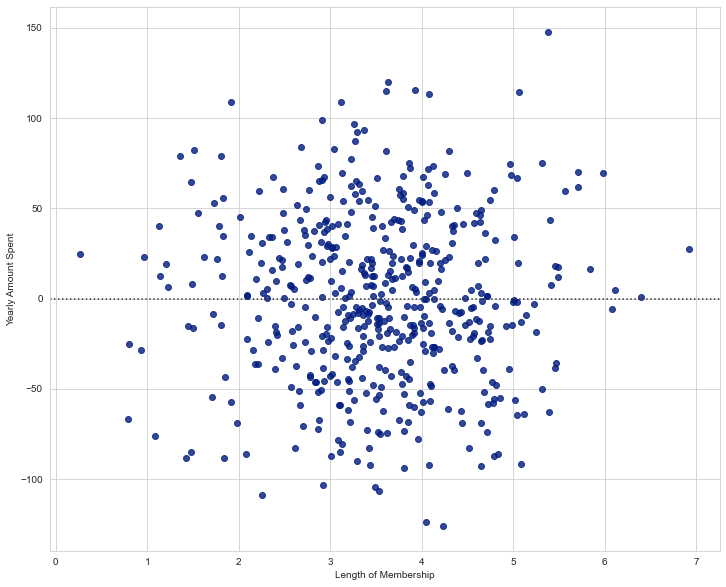

In [115]:
#Making a residual plot to check for the variance in the data
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x='Length of Membership',y='Yearly Amount Spent', data=data)
plt.show()

In [116]:
# Import libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [117]:
#assigning features 
x=data[['Length of Membership']] # since Length of menmbershi has the highest correlation with our target variable
y=data[['Yearly Amount Spent']]

In [118]:
#performing a train_test split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=1)


In [119]:
# creating an instance of linear regresssion model and then fitting it ot the data
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [120]:
#predicting using the linear regression model
pred=reg.predict(x_test)

Text(0.5, 1.0, 'Yearly Amount Spent')

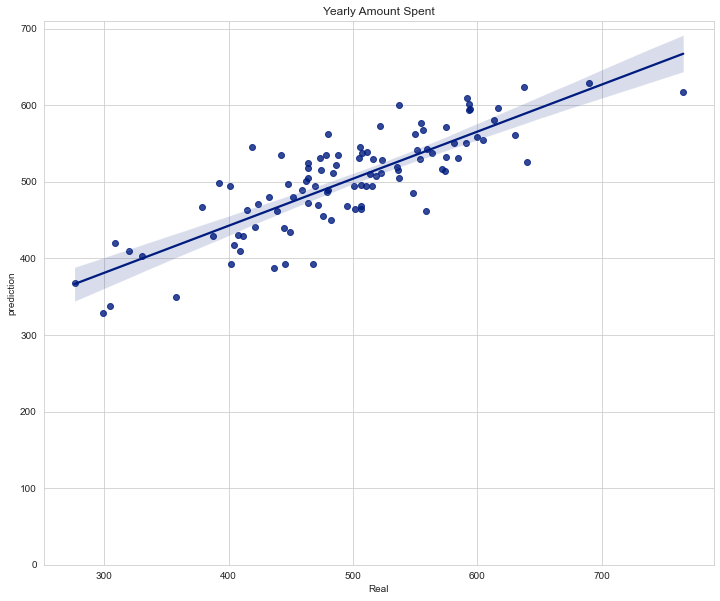

In [121]:
#generating a regplot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x=y_test, y=pred, data=data)
plt.ylim(0,)
plt.xlabel("Real")
plt.ylabel("prediction")
plt.title("Yearly Amount Spent")

Text(0.5, 1.0, 'Yearly Amount Spent')

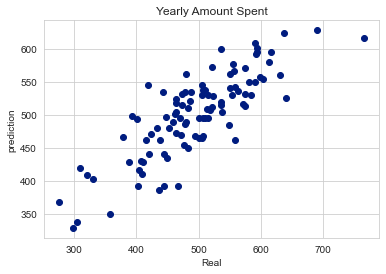

In [122]:
#Scatterplt to check the distribution of data
plt.scatter(y_test, pred)
plt.xlabel("Real")
plt.ylabel("prediction")
plt.title("Yearly Amount Spent")

In [123]:
#calculating the error metrics and R^2 score.
MAE= metrics.mean_absolute_error(y_test,pred) #Mean absolute error 
MSE= metrics.mean_squared_error(y_test,pred) #Mean squared error 
RMSE = np.sqrt(MSE)
R2=reg.score(x_train,y_train)

In [124]:
#printing the metrics
print("Mean absolute error: ",MAE )
print('The R-square the Ris: ', R2)

Mean absolute error:  38.882994900419824
The R-square the Ris:  0.6503054514270881


In [125]:
#Finding the y-intercept
reg.intercept_

array([278.26103868])

In [126]:
#Finding the coefficients of the regression model
coef1= reg.coef_
print(coef1)

[[62.9080551]]


### since for a single regression model= y=mx1+c

where, m =coefficients

x1= theindependent variables used in the model.

and c= y-intercept


so yearly amount spent= 65.96699664*Length of Membership - 265.43683549]

# Multiple Regression Model

In [127]:
#assigning features 
features=data.columns[3:-1]
x_mult=data[features] # for multiple regression model
y_mult=data[['Yearly Amount Spent']]

In [128]:
x_mult_train,x_mult_test, y_mult_train, y_mult_test= train_test_split(x_mult, y_mult, test_size=0.2, random_state=2)


In [129]:
# creating an instance of multiple regresssion model and then fitting it ot the data
reg2=LinearRegression()
reg2.fit(x_mult_train,y_mult_train)

LinearRegression()

In [130]:
#predicting using the linear regression model
pred1=reg2.predict(x_mult_test)

Text(0.5, 1.0, 'Yearly Amount Spent')

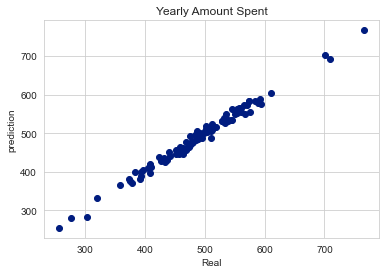

In [131]:
#Making a scatterplot
plt.scatter(y_mult_test, pred1)
plt.xlabel("Real")
plt.ylabel("prediction")
plt.title("Yearly Amount Spent")

Text(0.5, 1.0, 'Yearly Amount Spent')

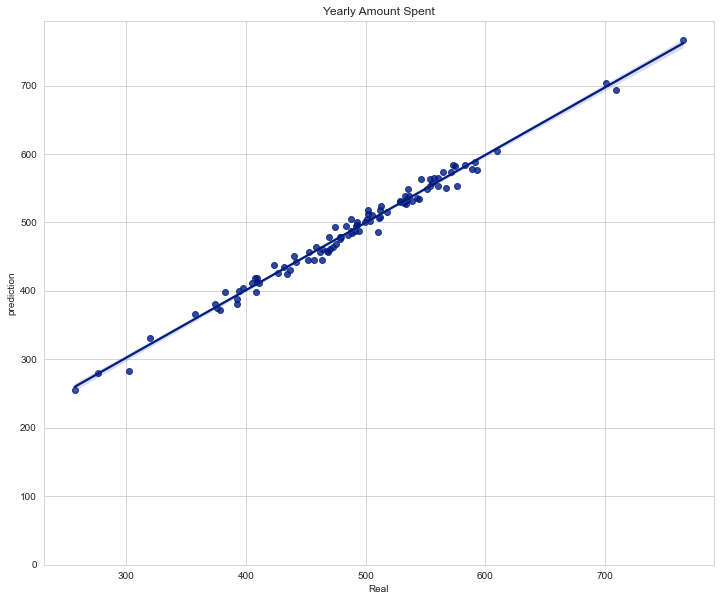

In [132]:
#making a Regression plot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x=y_mult_test, y=pred1, data=data)
plt.ylim(0,)
plt.xlabel("Real")
plt.ylabel("prediction")
plt.title("Yearly Amount Spent")

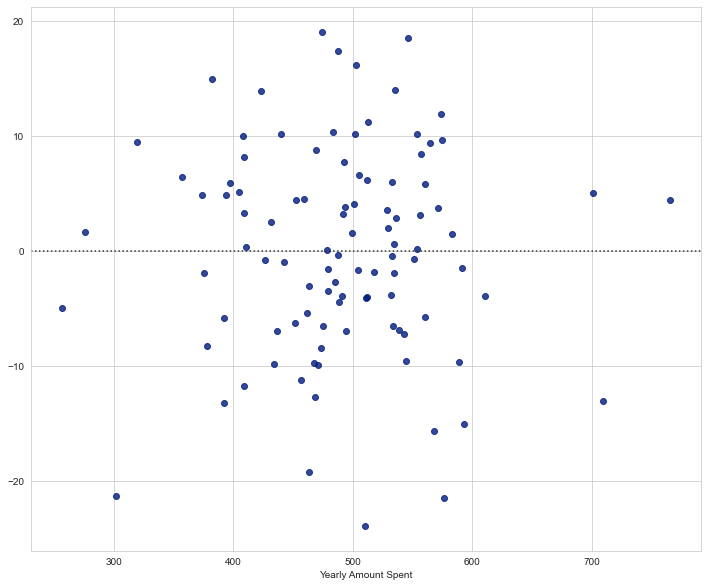

In [133]:
#Making a residual plot to check for the variance in the data
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=y_mult_test, y=pred1)
plt.show()

In [134]:
#calculating the error metrics and R^2 score.
MAEm= metrics.mean_absolute_error(y_mult_test,pred1) #Mean absolute error 
MSEm= metrics.mean_squared_error(y_mult_test,pred1) #Mean squared error 
RMSEm = np.sqrt(MSEm)
R2m=reg2.score(x_mult_train,y_mult_train)

In [135]:
#printing the metrics
print("Mean absolute error: ", MAEm )
print('The R-square the Ris: ', R2m)

Mean absolute error:  7.1826892337107635
The R-square the Ris:  0.9832679605683918


In [136]:
#Finding the y-intercept
reg2.intercept_

array([-1055.19187516])

In [137]:
#Finding the coefficients of the regression model
coef2= reg2.coef_
coef2=coef2.reshape(4,1)
coeff_table1 = pd.DataFrame(coef2, features, columns=['Coefficient'])
coeff_table1

,Coefficient
Avg. Session Length,25.723477
Time on App,38.895700
Time on Website,0.496052
Length of Membership,61.438644


### since for a multiple regression model= y=mx1+m2x2+m3x3+m4x4+c

where, m1...m4=coefficients

x1...x4= the various independt variables used in the models

and c= y-intercept


so yearly amount spent= 25.325625*Avg. Session Length +38.330815*Time on App + 0.642505 * Time Website 
                                + 61.918068*Length of Membership - 1042.61367129953

## Comparison of Models

In [138]:
all_MAE=[MAE,MAEm]
all_MSE=[MSE,MSEm]
all_RMSE=[RMSE,RMSEm]
all_R2=[R2,R2m]
models=['Linear Regression','Multiple Regression']

In [139]:
#compiling the data into a table
model_data = pd.DataFrame([all_MAE,all_MSE,all_RMSE,all_R2] ,columns=models, index = ['MAE','MSE','RMSE','R2'])
model_data.style.background_gradient(cmap='coolwarm',axis=0)

,Linear Regression,Multiple Regression
MAE,38.882995,7.182689
MSE,2446.501920,81.226189
RMSE,49.462126,9.012557
R2,0.650305,0.983268


### When comparing models, the model with the higher R-squared value and the smallest MSE value is a better fit for the data.

### Thus, Multiple Regression model is the better performing model.

### Checking for discrepancy

In [140]:
#Calculating the R2 score for the test dataset for Multiple Regression Model.
R2_test=reg2.score(x_mult_test,y_mult_test)
R2_test

0.9878559970002221

Here,the the R2 score for the test dataset is slightly better than the training dataset, which is usallynnot a good sign

however, the difference is negligible and this difference could also be due to luck.

so we perform cross validation for reassurance.

In [141]:
#Importing the library for cross validation
from sklearn.model_selection import cross_val_score

In [142]:
#Finding The R2 score for each fold.
Rcross = cross_val_score(reg2, x_mult, y_mult, cv=10)
Rcross


array([0.98190497, 0.9829772 , 0.97034527, 0.9869036 , 0.98673611,
       0.98754824, 0.98637255, 0.98095566, 0.98535607, 0.97639304])

In [143]:
#calculating mean of the folds and the standard deviation
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.9825492707486994 and the standard deviation is 0.005234020244281335


Here, the R2 score of Training data> Testing Data. 

# Gradient Boosting Model.

In [205]:
#intialising the model
GB= GradientBoostingRegressor()
GB.fit(x_mult_train,y_mult_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor()

In [206]:
#making predictions on training set
y_mult_pred_train=GB.predict(x_mult_train)
# calculating the R2_score
rrt=metrics.r2_score(y_mult_train,y_mult_pred_train)
rrt

0.9924805502279513

In [208]:
#making predictions on test set
y_mult_pred_test=GB.predict(x_mult_test)
# calculating the R2_score
gbrte=metrics.r2_score(y_mult_test,y_mult_pred_test)
gbrte

0.959380429260926

In [202]:
###Linear Regression_Hyper Parameter Tuning
from sklearn.ensemble import GradientBoostingRegressor
model_GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
GBR_cv=GridSearchCV(model_GBR,parameters,scoring='r2',cv=2, n_jobs=-1)
GBR_cv.fit(x_mult_train,y_mult_train)

 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]},
             scoring='r2')

In [204]:
#finding the best parameters
GBR_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.1}

In [212]:
#Using the best parameters to predict the output
GBR=GradientBoostingRegressor(learning_rate= 0.01, max_depth= 4, n_estimators= 1000, subsample= 0.1)
GBR.fit(x_mult_train,y_mult_train)

#making predictions on training set
y_mult_pred_train=GBR.predict(x_mult_train)
# calculating the R2_score
gbrt2=metrics.r2_score(y_mult_train,y_mult_pred_train)
print(gbrt2)

#making predictions on test set
y_mult_pred_test=ridge.predict(x_mult_test)
# calculating the R2_score
gbrte2=metrics.r2_score(y_mult_test,y_mult_pred_test)
print(gbrte2)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9901799081485133
0.9878571320526777


<AxesSubplot:>

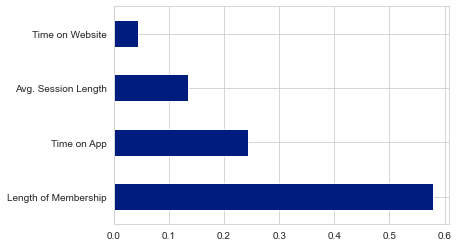

In [220]:
feat_importances = pd.Series(GBR.feature_importances_, index=x_mult.columns)
feat_importances.nlargest(20).plot(kind='barh')

## Ridge

In [144]:
#importing the libraries
from sklearn.linear_model import Ridge

In [145]:
#intialising the model
ridge=Ridge(0.01)
ridge.fit(x_mult_train,y_mult_train)

Ridge(alpha=0.01)

In [146]:
#making predictions on training set
y_mult_pred_train=ridge.predict(x_mult_train)
# calculating the R2_score
rrt=metrics.r2_score(y_mult_train,y_mult_pred_train)
rrt

0.9832679599727012

In [147]:
#making predictions on test set
y_mult_pred_test=ridge.predict(x_mult_test)
# calculating the R2_score
rrte=metrics.r2_score(y_mult_test,y_mult_pred_test)
rrte

0.987855941980612

In [ ]:
#performing hyper parameter tuning
from sklearn.model_selection import GridSearchCV

model_ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}
ridge_cv=GridSearchCV(model_ridge,parameters,scoring='r2',cv=5)
ridge_cv.fit(x_mult_train,y_mult_train)

In [149]:
#finding the best parameters
ridge_cv.best_params_

{'alpha': 0.01, 'solver': 'sparse_cg'}

In [150]:
#Using the best parameters to predict the output
ridge=Ridge(0.01,solver='sparse_cg')
ridge.fit(x_mult_train,y_mult_train)

#making predictions on training set
y_mult_pred_train=ridge.predict(x_mult_train)
# calculating the R2_score
rrt2=metrics.r2_score(y_mult_train,y_mult_pred_train)
print(rrt2)

#making predictions on test set
y_mult_pred_test=ridge.predict(x_mult_test)
# calculating the R2_score
rrte2=metrics.r2_score(y_mult_test,y_mult_pred_test)
print(rrte2)

0.9832679525938236
0.9878571320526777


### Lasso

In [175]:
#importing the lasso library
from sklearn.linear_model import Lasso

In [152]:
#intialising the model
Lasso=Lasso(0.01)
Lasso.fit(x_mult_train,y_mult_train)

Lasso(alpha=0.01)

In [153]:
#making predictions on training set
y_mult_pred_train=Lasso.predict(x_mult_train)
# calculating the R2_score
lrt=metrics.r2_score(y_mult_train,y_mult_pred_train)
lrt

0.9832678968902914

In [154]:
#making predictions on test set
y_mult_pred_test=Lasso.predict(x_mult_test)
# calculating the R2_score
lrte=metrics.r2_score(y_mult_test,y_mult_pred_test)
lrte

0.9878572942436509

In [170]:
#performing hyper parameter tuning
model_lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_cv=GridSearchCV(model_lasso,parameters,scoring='r2',cv=5)
lasso_cv.fit(x_mult_train,y_mult_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8336.10063079279, tolerance: 197.85440699438445
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11441.821928450856, tolerance: 196.62383072634836
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13347.294564969445, tolerance: 192.65666178268978
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='r2')

In [172]:
#finding the best parameters
lasso_cv.best_params_

{'alpha': 1e-15}

In [176]:
#Using the best parameters to predict the output
#intialising the model
Lasso=Lasso(1e-15)
Lasso.fit(x_mult_train,y_mult_train)

#making predictions on training set
y_mult_pred_train=Lasso.predict(x_mult_train)
# calculating the R2_score
lrt2=metrics.r2_score(y_mult_train,y_mult_pred_train)
print(lrt2)

#making predictions on test set
y_mult_pred_test=Lasso.predict(x_mult_test)
# calculating the R2_score
lrte2=metrics.r2_score(y_mult_test,y_mult_pred_test)
print(lrte2)

0.9832679605683918
0.9878559970002221


In [216]:
all_rrte=[rrte,rrte2]
all_lrte=[lrte,lrte2]
all_gbrte=[gbrte,gbrte2]
models_2=['Default_Parameters','Best_Parameters']

In [217]:
#compiling the data into a table
model
model_data2 = pd.DataFrame([all_gbrte,all_rrte,all_lrte] ,columns=models_2, index = ['Gradient Boosting','Ridge','Lasso'])
model_data2.style.background_gradient(cmap='coolwarm',axis=0)

,Default_Parameters,Best_Parameters
Gradient Boosting,0.959380,0.987857
Ridge,0.987857,0.987857
Lasso,0.987856,0.987856
